In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
df = pd.read_csv('data.csv')

In [54]:
print(df.shape)
n = df.shape[0]
df.sample(5)

(818238, 35)


,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label,KaggleSet,KaggleWeight
776642,876642,58.172,48.350,46.346,4.527,-999.0,-999.0,-999.0,2.258,4.527,...,-999.000,-999.000,-999.0,-999.0,-999.0,0.000,1.322611,b,b,10.771913
416735,516735,-999.000,93.883,69.749,38.297,-999.0,-999.0,-999.0,2.072,38.297,...,-999.000,-999.000,-999.0,-999.0,-999.0,-0.000,1.481837,b,v,2.694320
532354,632354,99.532,46.840,69.901,28.848,-999.0,-999.0,-999.0,3.116,6.063,...,-2.312,3.046,-999.0,-999.0,-999.0,32.550,0.512740,b,v,0.932279
222590,322590,113.356,65.991,77.142,0.178,-999.0,-999.0,-999.0,3.055,0.178,...,-999.000,-999.000,-999.0,-999.0,-999.0,0.000,1.764528,b,t,5.787049
167233,267233,138.794,23.731,87.540,40.811,-999.0,-999.0,-999.0,2.974,2.046,...,1.867,-2.129,-999.0,-999.0,-999.0,40.527,0.611624,b,t,2.005918


In [55]:
df['Label'] = np.where(df['Label']=='s', 1, 0)
df = df.drop(columns=["KaggleSet"])

In [56]:
df.sample(5)

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label,KaggleWeight
804785,904785,65.269,79.369,53.343,49.780,3.234,297.929,-2.029,1.494,28.733,...,65.198,-2.383,2.624,49.577,0.852,-0.811,114.775,0.325083,0,14.563939
212669,312669,117.976,1.020,65.232,35.206,-999.000,-999.000,-999.000,2.905,1.175,...,35.236,2.101,-0.661,-999.000,-999.000,-999.000,35.236,0.512740,0,1.681611
224977,324977,-999.000,71.520,55.035,64.354,-999.000,-999.000,-999.000,3.150,25.156,...,49.248,-1.449,-0.834,-999.000,-999.000,-999.000,49.248,0.603474,0,1.979189
330459,430459,120.173,12.596,91.982,25.269,-999.000,-999.000,-999.000,2.817,25.269,...,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-0.000,0.512740,0,4.175975
487580,587580,-999.000,34.819,63.328,90.131,-999.000,-999.000,-999.000,2.091,4.611,...,94.661,0.339,-0.399,-999.000,-999.000,-999.000,94.661,0.000814,1,0.001483


### proportion des classes:
#### 's'   vs   'b'

In [33]:
np.count_nonzero(df["Label"]==1) / len(df) 

0.3416609837235621

In [34]:
print("nombre de lignes complètes (sans -999) :")
seriesObj = df.apply(lambda x: -999.0 in list(x), axis=1)
numOfRows = len(seriesObj[seriesObj == False].index)
print(numOfRows, numOfRows/n)

nombre de lignes complètes (sans -999) :
223574 0.2732383487444973


In [35]:
restricted_df = df[seriesObj == False]
print(df.shape)
print(restricted_df.shape)

(818238, 34)
(223574, 34)


In [36]:
np.count_nonzero(restricted_df["Label"]==1) / len(restricted_df) 

0.46802848273949565

Travailler avec des vecteur contenant des données manquantes est compliqué.
Restreindre les lignes aux données complètes fait perdre 75% des données.

34% de s dans df mais 47% dans restricted. Si le set de base est représentatif de la réalité alors celui restreint ne l'est pas.

### Corrélation

(818238, 34) (34, 34)


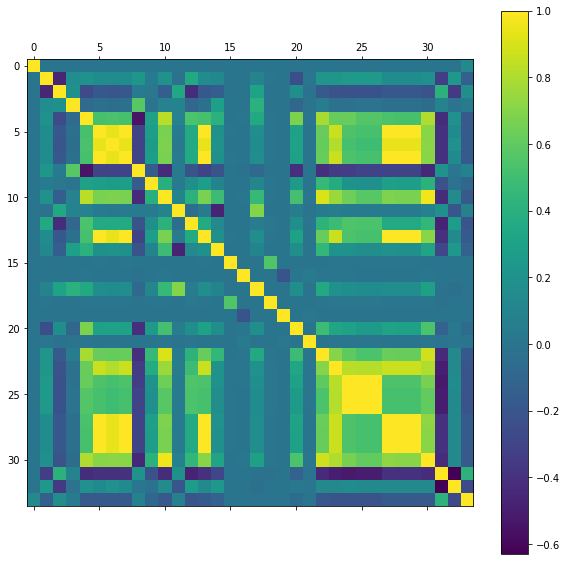

In [37]:
c = df.corr()
print(df.shape, c.shape)
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
p = ax.matshow(c)
fig.colorbar(p)

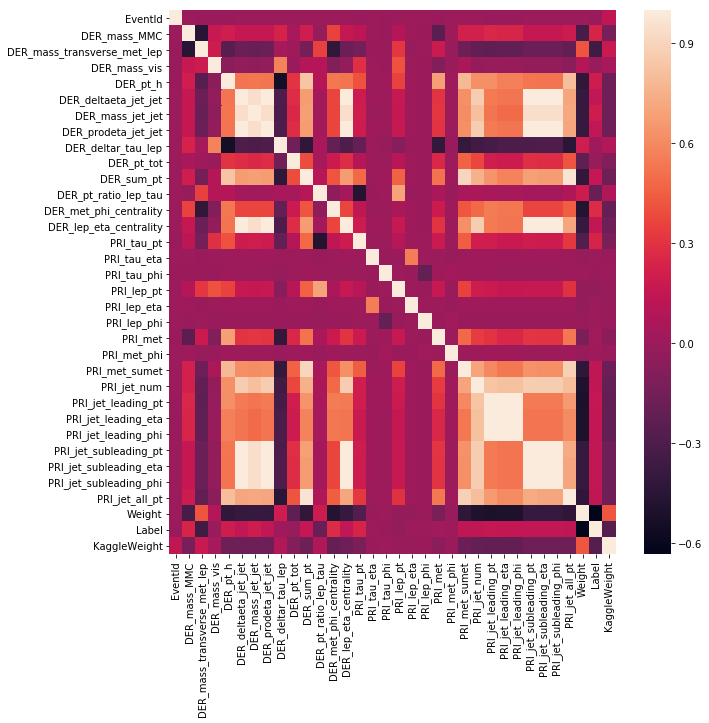

In [38]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
sns.heatmap(c, ax=ax)

In [39]:
df = df.replace(-999.0, np.nan)

(818238, 34) (34, 34)


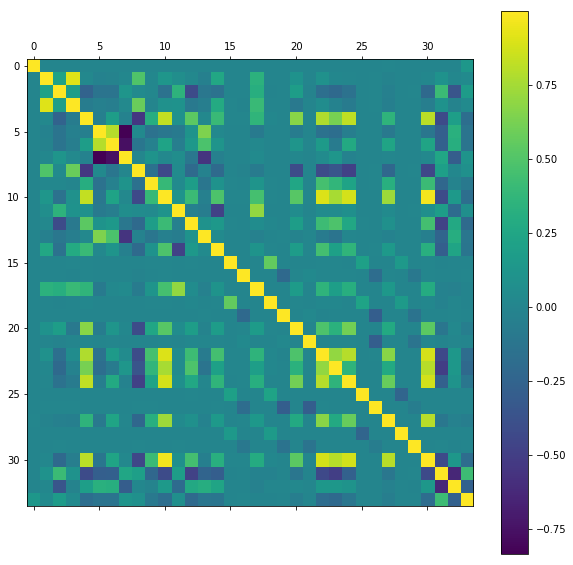

In [40]:
c = df.corr()
print(df.shape, c.shape)
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
p = ax.matshow(c)
fig.colorbar(p)

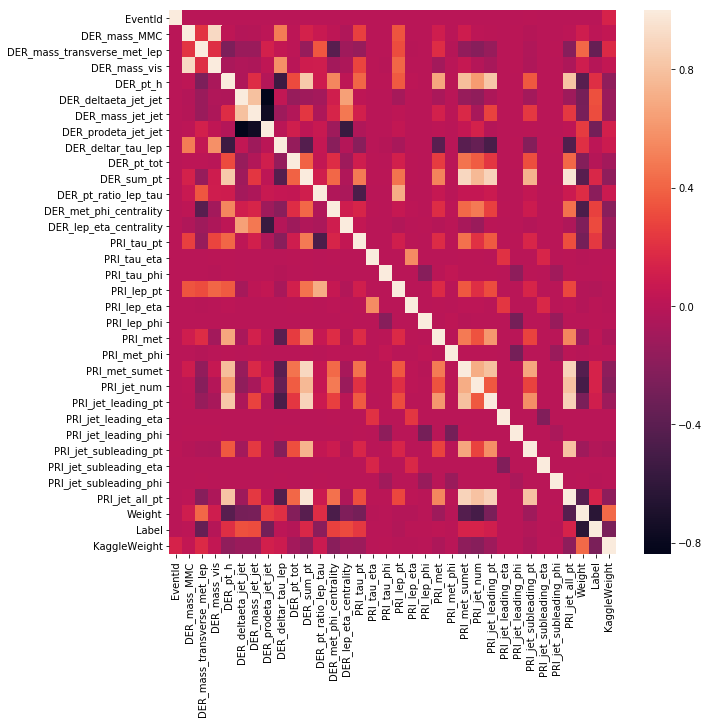

In [41]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
sns.heatmap(c, ax=ax)

In [60]:
df_corr = pd.DataFrame(sorted(c["Label"].items(), key=lambda x:abs(x[1]))).rename(columns={0:'attribut',1:'coefficient de corrélation'}).set_index(['attribut'])

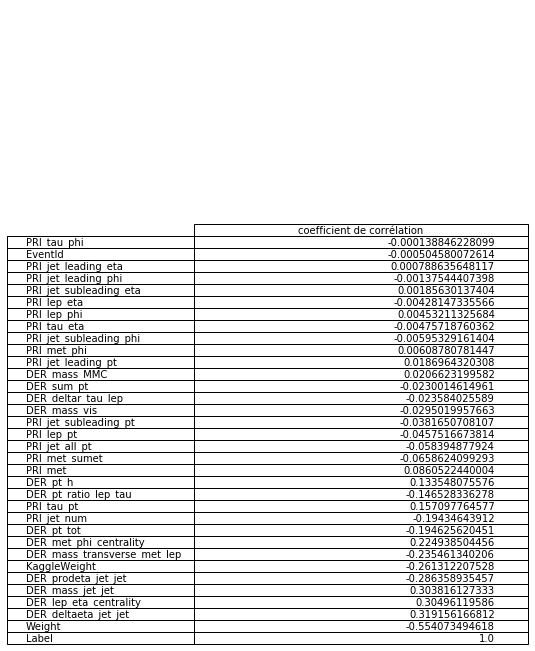

In [62]:
from pandas.plotting import table 
ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis

table(ax, df_corr)  # where df is your data frame

plt.savefig('mytable.png')

(223574, 34) (34, 34)


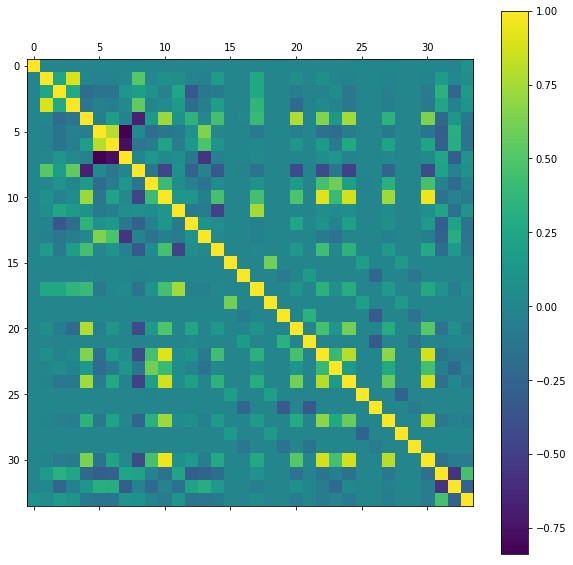

In [43]:
c = restricted_df.corr()
print(restricted_df.shape, c.shape)
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
p = ax.matshow(c)
fig.colorbar(p)

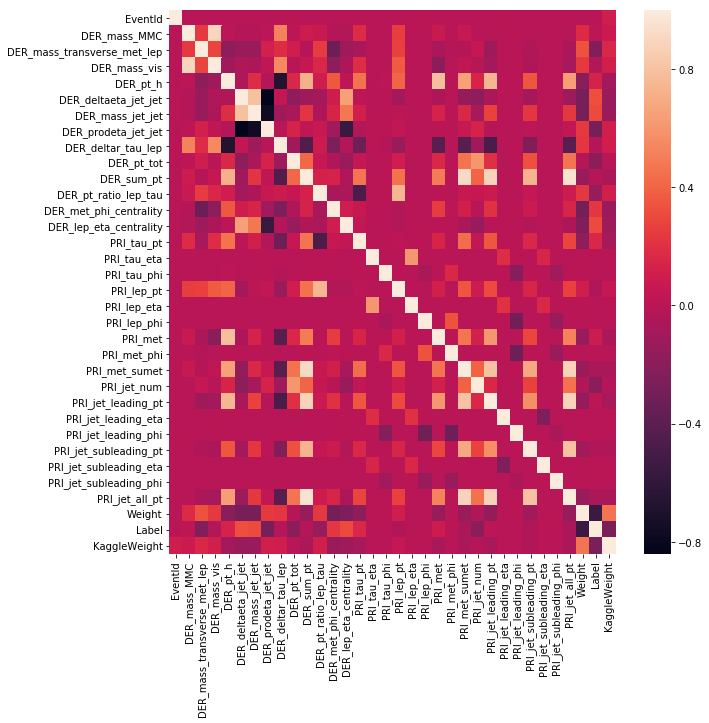

In [44]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
sns.heatmap(c, ax=ax)

In [12]:
#df = df.drop(columns=["EventId", "Weight", "KaggleWeight"])
print(df.shape)

(818238, 34)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x115b83a58>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x121e85470>], dtype=object)

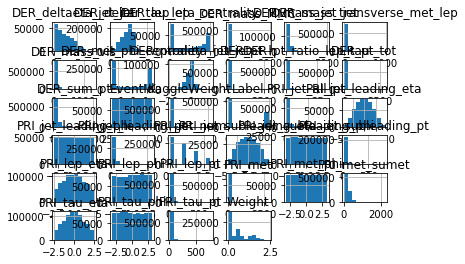

In [68]:
df.hist()[1]

TypeError: float() argument must be a string or a number, not 'AxesSubplot'

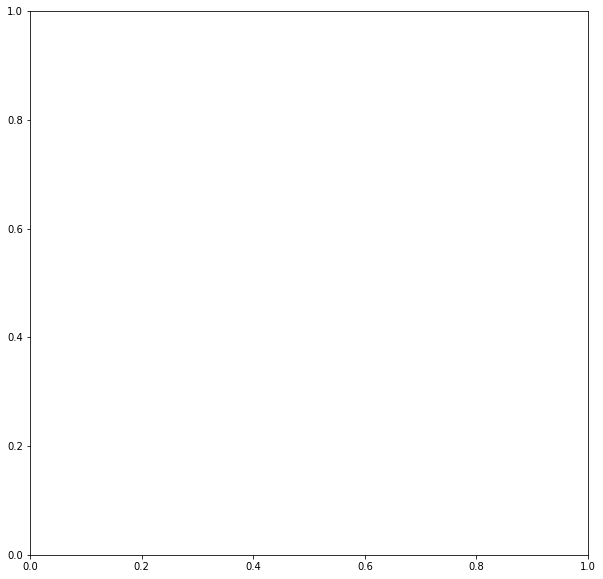

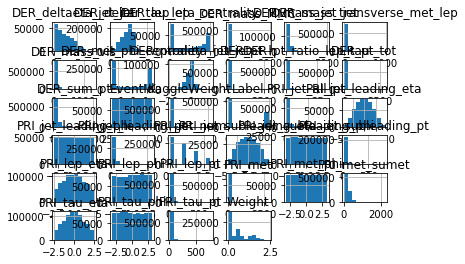

In [66]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
hist = df.hist()
ax.plot(hist)